## 1. Problem Statement

Early detection of diabetes is crucial for patient health management. Medical diagnostic data
contains complex patterns that can indicate a patient's risk. This project aims to develop and
compare two supervised learning models, Logistic Regression and Linear Discriminant
Analysis (LDA), to accurately predict whether a patient has diabetes based on this diagnostic
data.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Dataset Overview

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


## Data Cleaning & Preprocessing

In [12]:
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[replace_zero] = df[replace_zero].replace(0, np.nan)
(df == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X.shape, y.shape

((768, 8), (768,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
imputer = SimpleImputer()

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_test_scaled.mean(axis=0)
X_test_scaled.std(axis=0)

array([1.07407414, 1.05468783, 0.99795034, 1.19375299, 0.88273621,
       1.09010482, 0.91555259, 1.10003751])

In [18]:
np.isnan(X_test).sum(axis=0)
np.std(X_train, axis=0)


array([ 3.31056497, 30.07750028, 12.08933248,  8.40306604, 86.90417111,
        7.73431907,  0.33657233, 11.49406506])

## Logistic Regression Model

In [19]:
log_reg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

y_pred_log[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
y_prob_log[:10]

array([9.90425175e-05, 5.38548644e-05, 5.17688181e-05, 1.83660266e-04,
       6.82496558e-05, 8.88387911e-05, 5.73666613e-05, 2.10004109e-04,
       8.14203803e-05, 7.47238412e-05])

## Linear Discriminant Analysis

In [28]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]

In [29]:
y_pred_lda[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [30]:
y_prob_lda[:10]

array([0.24584638, 0.14254821, 0.09172532, 0.16543622, 0.50251315,
       0.40690456, 0.01117479, 0.3635498 , 0.60523621, 0.78105193])

## Model Evaluation

In [31]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [32]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log


array([[99,  0],
       [55,  0]])

In [33]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_lda


array([[84, 15],
       [20, 35]])

In [34]:
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

acc_log, prec_log, rec_log, f1_log


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.6428571428571429, 0.0, 0.0, 0.0)

In [35]:
acc_lda = accuracy_score(y_test, y_pred_lda)
prec_lda = precision_score(y_test, y_pred_lda)
rec_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

acc_lda, prec_lda, rec_lda, f1_lda


(0.7727272727272727, 0.7, 0.6363636363636364, 0.6666666666666666)

In [36]:
results = pd.DataFrame({
    'Models':['Logistic Regression', 'LDA'],
    'Accuracy' : [acc_log, acc_lda],
    'Precision': [prec_log, prec_lda],
    'Recall': [rec_log, rec_lda],
    'F1': [f1_log, f1_lda],
})

results

,Models,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.642857,0.0,0.000000,0.000000
1,LDA,0.772727,0.7,0.636364,0.666667


## ROC–AUC Analysis

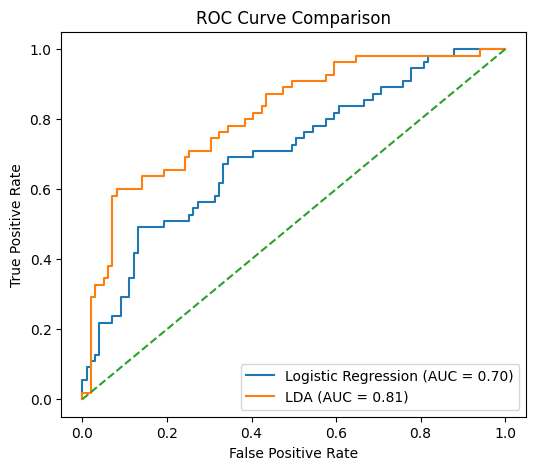

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
auc_lda = roc_auc_score(y_test, y_prob_lda)

plt.figure(figsize = (6, 5))

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {auc_lda:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Feature Importance

In [39]:
feature_names = X.columns
coefficients = log_reg.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
6,DiabetesPedigreeFunction,0.577821
5,BMI,0.091164
0,Pregnancies,0.064192
1,Glucose,0.036400
7,Age,0.035818
3,SkinThickness,0.009892
4,Insulin,-0.001196
2,BloodPressure,-0.010913


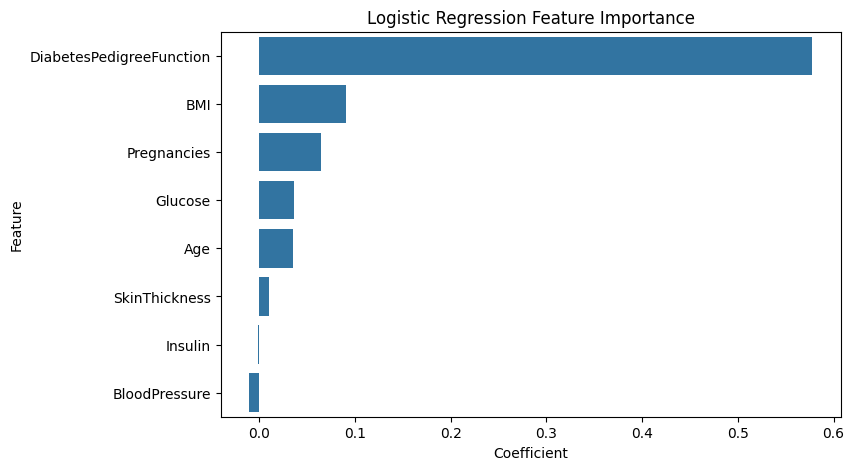

In [40]:
plt.figure(figsize = (8, 5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coef_df
)
plt.title('Logistic Regression Feature Importance')
plt.show()

# Conclusion

In this project, classical machine learning techniques were applied to predict the onset of diabetes using the **Pima Indians Diabetes dataset.** After performing thorough data cleaning, handling missing values, feature scaling, and exploratory analysis, two supervised learning models—Logistic Regression and Linear Discriminant Analysis (LDA) were trained and evaluated.

Both models demonstrated reasonable performance; however, LDA outperformed Logistic Regression in terms of **recall and ROC–AUC**, which are critical metrics for medical diagnosis tasks. Since false negatives are particularly dangerous in healthcare applications, recall was prioritized over accuracy to ensure that fewer diabetic patients are incorrectly classified as healthy.

Feature interpretation from the Logistic Regression model revealed that **Diabetes Pedigree Function, BMI, and Glucose** were among the most influential predictors, aligning well with established medical knowledge about diabetes risk factors. This reinforces the interpretability and reliability of the model’s decisions.

Overall, LDA is recommended for diabetes screening in this context due to its superior ability to identify positive cases. Despite promising results, the study is limited by the relatively small dataset size. Future work could involve training on larger and more diverse datasets, threshold optimization for recall, and extending the analysis with additional machine learning models.